# ESDP - Homework 2
Johanna Kasischke

## Jupyter notebook for downloading ERA5 humidity data and processing

In [50]:
import cdsapi

c = cdsapi.Client()



2025-12-22 16:26:51,355 INFO [2025-12-03T00:00:00Z] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.


In [51]:
### Change here the concrete information for the specific dataset

dataset = "derived-era5-pressure-levels-daily-statistics"

class_ = "ea"
pro_type = "reanalysis"
var = ["specific_humidity"] # define variable
year = "2024"
month = ["12"]
day = ["01", "02", "03","04", "05"]
pressure_lev = ["300", "500", "800","900", "975"]
d_statistic = "daily_mean"
time_zone = "utc+00:00"
freq = "6_hourly"
grid = "1.625/1.625"
format = "netcdf"
type_ = "fc"
levtype = "pl"
stream = "oper"
output_filename = "era5_" + year + "_" + freq


### DO NOT CHANGE! ####
c.retrieve(dataset, {
    "class": class_,
    "product_type": pro_type,
    "variable": var,
    "year": year,
    "month": month,
    "day": day,
    "pressure_level": pressure_lev,
    "daily_statistic": d_statistic,
    "time_zone": time_zone,
    "frequency": freq,
    "grid": grid,
    "format": format,
    "type": type_,
    "levtype": levtype,
    "stream": stream,
}, output_filename)



2025-12-22 16:26:51,662 INFO Request ID is 41f72ff6-056a-45fb-bf1f-f803814a0b05
2025-12-22 16:26:51,725 INFO status has been updated to accepted
2025-12-22 16:27:05,680 INFO status has been updated to running
2025-12-22 16:27:24,769 INFO status has been updated to successful


'era5_2024_6_hourly'

In [52]:
# Try opening the retrieved data with xarray
import xarray as xr
ds = xr.open_dataset(output_filename, engine='netcdf4')
print(ds)

<xarray.Dataset> Size: 2MB
Dimensions:         (valid_time: 5, pressure_level: 5, latitude: 111,
                     longitude: 222)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 40B 2024-12-01 ... 2024-12-05
  * pressure_level  (pressure_level) float64 40B 975.0 900.0 800.0 500.0 300.0
  * latitude        (latitude) float64 888B 89.38 87.75 86.12 ... -87.75 -89.38
  * longitude       (longitude) float64 2kB 0.0 1.625 3.25 ... 355.9 357.5 359.1
    number          int64 8B ...
Data variables:
    q               (valid_time, pressure_level, latitude, longitude) float32 2MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-22T15:27 GRIB to CDM+CF via cfgrib-0.9.1...


In [53]:
# Let us inspect the time steps that we retrieved
print(ds['valid_time'])

<xarray.DataArray 'valid_time' (valid_time: 5)> Size: 40B
array(['2024-12-01T00:00:00.000000000', '2024-12-02T00:00:00.000000000',
       '2024-12-03T00:00:00.000000000', '2024-12-04T00:00:00.000000000',
       '2024-12-05T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 40B 2024-12-01 ... 2024-12-05
    number      int64 8B ...
Attributes:
    long_name:      time
    standard_name:  time
    time_shift:     0 days 00:00:00


In [54]:
ds.dims

FrozenMappingWarningOnValuesAccess({'valid_time': 5, 'pressure_level': 5, 'latitude': 111, 'longitude': 222})

In [55]:
ds.coords

Coordinates:
  * valid_time      (valid_time) datetime64[ns] 40B 2024-12-01 ... 2024-12-05
  * pressure_level  (pressure_level) float64 40B 975.0 900.0 800.0 500.0 300.0
  * latitude        (latitude) float64 888B 89.38 87.75 86.12 ... -87.75 -89.38
  * longitude       (longitude) float64 2kB 0.0 1.625 3.25 ... 355.9 357.5 359.1
    number          int64 8B ...

In [56]:
ds.data_vars

Data variables:
    q        (valid_time, pressure_level, latitude, longitude) float32 2MB ...

In [57]:
ds.attrs

{'GRIB_centre': 'ecmf',
 'GRIB_centreDescription': 'European Centre for Medium-Range Weather Forecasts',
 'GRIB_subCentre': np.int64(0),
 'Conventions': 'CF-1.7',
 'institution': 'European Centre for Medium-Range Weather Forecasts',
 'history': '2025-12-22T15:27 GRIB to CDM+CF via cfgrib-0.9.15.1/ecCodes-2.42.0 with {"source": "specific_humidity.grib", "filter_by_keys": {"stream": ["oper"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}\nearthkit.transforms.aggregate.temporal.daily_reduce(specific_humidity_stream-oper, how=mean, **{\'time_shift\': {\'hours\': 0}})'}

In [58]:
ds['q']

<xarray.DataArray 'q' (valid_time: 5, pressure_level: 5, latitude: 111,
                       longitude: 222)> Size: 2MB
[616050 values with dtype=float32]
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 40B 2024-12-01 ... 2024-12-05
  * pressure_level  (pressure_level) float64 40B 975.0 900.0 800.0 500.0 300.0
  * latitude        (latitude) float64 888B 89.38 87.75 86.12 ... -87.75 -89.38
  * longitude       (longitude) float64 2kB 0.0 1.625 3.25 ... 355.9 357.5 359.1
    number          int64 8B ...
Attributes: (12/31)
    GRIB_paramId:                             133
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      24642
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           q
    GRIB_totalNumber:                         0
    GRIB_units:                               kg kg**-1
    long_name:                                Specific humidity
    units:                                    kg kg**-1
    standard_name:                            specific_humidity

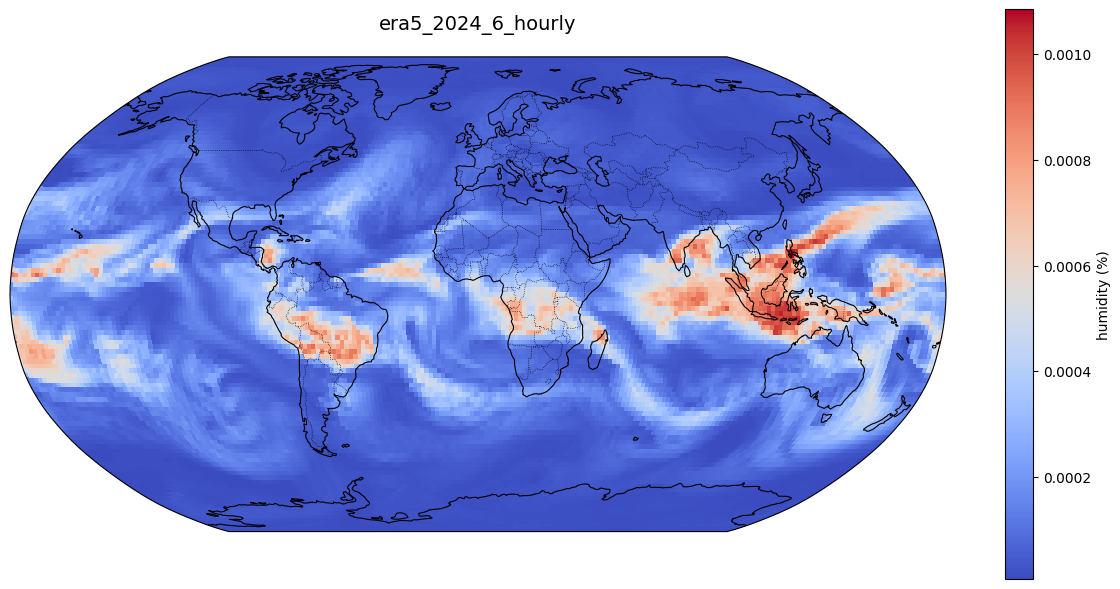

In [59]:
%matplotlib inline
# and produce a simple plot of the 1000 hPa temperature field
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select data for pressure level 1000 hPa (index 0, since pressure_level[0] = 1000.0)
# and valid_time on April 3, 2021 at 00:00
t_data = ds['q'].sel(
    pressure_level=300.0,
    valid_time='2024-12-01T00:00:00'
)

# Create the plot with Robinson projection
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())

# Plot the temperature field
cf = t_data.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),  # Data is in PlateCarree (lon/lat)
    cmap='coolwarm',
    cbar_kwargs={'label': 'humidity (%)'},
    add_colorbar=True,
    add_labels=False  # Avoid duplicate labels
)

# Set title
ax.set_title(output_filename, fontsize=14, pad=20)

# Add coastlines and country borders
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')

# Set global view
ax.set_global()

# Improve layout
plt.tight_layout()